# Task: Petrol price forecasting with LSTM

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import utils

In [3]:
np.random.seed(1)

In [4]:
df = pd.read_csv('wfp_food_prices_nigeria.csv')
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
2,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
3,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
4,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN


In [5]:
df.shape

(45577, 17)

In [6]:
df.isnull().sum()

date            0
cmname          0
unit            0
category        0
price           0
currency        0
country         0
admname         0
adm1id          0
mktname         0
mktid           1
cmid            0
ptid            1
umid            1
catid           0
sn              0
default     45577
dtype: int64

In [7]:
df['cmname'].unique()

array(['#item+name', 'Bread - Retail', 'Oil (palm) - Wholesale',
       'Oil (palm) - Retail', 'Rice (imported) - Wholesale',
       'Rice (imported) - Retail', 'Maize (white) - Wholesale',
       'Maize (white) - Retail', 'Rice (local) - Wholesale',
       'Rice (local) - Retail', 'Millet - Wholesale', 'Millet - Retail',
       'Yam - Wholesale', 'Yam - Retail',
       'Groundnuts (shelled) - Wholesale',
       'Groundnuts (shelled) - Retail', 'Sorghum (white) - Wholesale',
       'Sorghum (white) - Retail', 'Maize (yellow) - Wholesale',
       'Maize (yellow) - Retail', 'Fuel (diesel) - Retail',
       'Fuel (petrol-gasoline) - Retail', 'Cowpeas (white) - Wholesale',
       'Cowpeas (white) - Retail', 'Cowpeas (brown) - Wholesale',
       'Cowpeas (brown) - Retail', 'Sorghum (brown) - Wholesale',
       'Sorghum (brown) - Retail',
       'Cassava meal (gari, yellow) - Wholesale',
       'Cassava meal (gari, yellow) - Retail', 'Gari (white) - Wholesale',
       'Gari (white) - Retail'

I am only interested in the Diesel commodity.
It is written as 'Fuel (diesel) - Retail' under in cmname column

In [8]:
_, petrol = utils.process_data(df, 'Fuel (petrol-gasoline) - Retail')
petrol.head()

,price
date,
2014-05-15,97.0
2014-07-15,97.0
2014-08-15,97.0
2014-09-15,97.0
2014-10-15,97.0


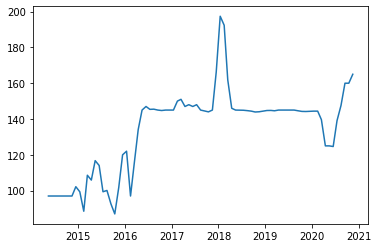

In [9]:
plt.plot(petrol)

In [10]:
petrol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2014-05-15 to 2020-11-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   77 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


## petrol

monthly data from 2014 - 2020; 7 years, 77 months

Convert data from time series to supervised learning.
This can be done by creating look back features from the data. The number of look backs created can vary

In [11]:
price = petrol['price'].values.reshape(-1, 1)
price[:5]

array([[97.],
       [97.],
       [97.],
       [97.],
       [97.]])

In [12]:
#initialize scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

scaler = scaler.fit(price)

In [13]:
#scale data
scaled_data = scaler.transform(price)
scaled_data[:5]

array([[-0.81884058],
       [-0.81884058],
       [-0.81884058],
       [-0.81884058],
       [-0.81884058]])

In [14]:
scaled_data.shape

(77, 1)

In [15]:
scaled_data.shape

(77, 1)

In [16]:
#make into supervised learning
data_with_lag = utils.timeseries_to_supervised(scaled_data)
data_with_lag.columns = ['price', 'lag_1']
data_with_lag.head()

,price,lag_1
0,0.000000,-0.818841
1,-0.818841,-0.818841
2,-0.818841,-0.818841
3,-0.818841,-0.818841
4,-0.818841,-0.818841


In [17]:
#separate into feature and target sets
X, y = utils.feature_target(data_with_lag)

In [18]:
X[:5]

array([[[ 0.        ]],

       [[-0.81884058]],

       [[-0.81884058]],

       [[-0.81884058]],

       [[-0.81884058]]])

In [19]:
y[:5]

array([[-0.81884058],
       [-0.81884058],
       [-0.81884058],
       [-0.81884058],
       [-0.81884058]])

Build LSTM Model

In [20]:
model = utils.build_LSTM(X)

In [21]:
history = model.fit(X, y, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
77/77 [==============================] - 3s 2ms/step - loss: 0.2598
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 0.2036
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 4/100
77/77 [==============================] - 0s 3ms/step - loss: 0.1733
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.1555
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1478
Epoch 7/100
77/77 [==============================] - 0s 3ms/step - loss: 0.1511
Epoch 8/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1165
Epoch 9/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1167
Epoch 10/100
77/77 [==============================] - 0s 3ms/step - loss: 0.1316
Epoch 11/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1138
Epoch 12/100
77/77 [==============================] - 0s 3ms/step - loss: 0.1223
Epoch 13/100
77/77 [=================

Text(0.5, 1.0, 'Model Accuracy')

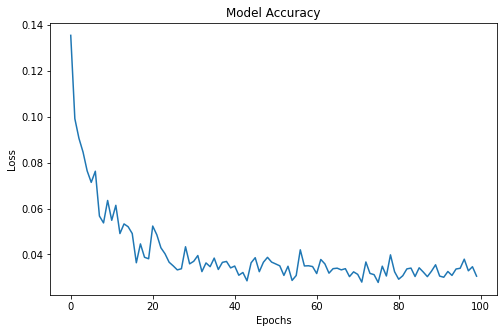

In [22]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [23]:
y_pred = model.predict(X, batch_size=1)

To check how well the model performed
- inverse transform the forecast for scaling
- create a dataframe with the date, original and the predicted data
- plot the data

In [24]:
#inverse transform prediction to get predicted price
inverted_y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1) )
inverted_y_pred[:5]

array([[134.94962 ],
       [ 96.6414  ],
       [ 88.409004],
       [ 96.20622 ],
       [ 98.89828 ]], dtype=float32)

In [25]:
df = pd.DataFrame()

df['date'] = petrol.index
df['price'] = list(petrol['price'])
df['predicted_price'] = inverted_y_pred
df.head()

,date,price,predicted_price
0,2014-05-15,97.0,134.949615
1,2014-07-15,97.0,96.641403
2,2014-08-15,97.0,88.409004
3,2014-09-15,97.0,96.206223
4,2014-10-15,97.0,98.898277


In [26]:
mean_squared_error(df['price'], df['predicted_price'])

108.47061646103943

In [27]:
#rmse
np.sqrt(mean_squared_error(df['price'], df['predicted_price']))

10.414922777488052

In [28]:
r2_score(df['price'], df['predicted_price'])

0.7983591736030963

In [30]:
mape = utils.mean_absolute_percentage_error(df['price'], df['predicted_price'])
mape

5.486296160002337

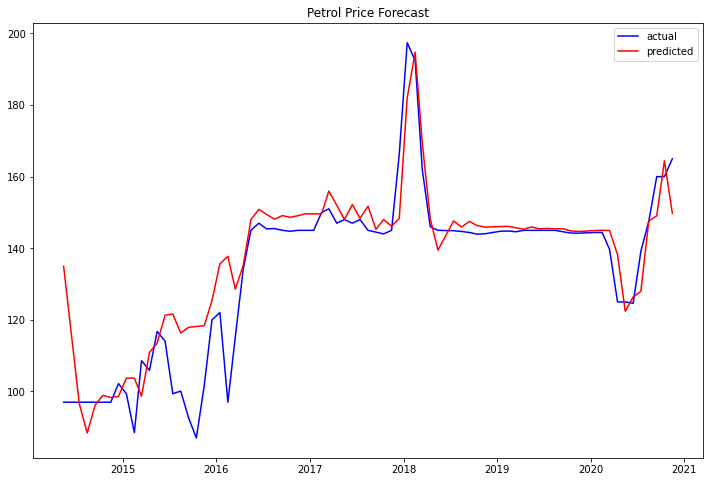

In [31]:
df.set_index('date', inplace=True)

plt.figure(figsize=(12,8))
plt.plot(df['price'], color="blue", label="actual")
plt.plot(df['predicted_price'], color="red", label="predicted")
plt.title("Petrol Price Forecast")
plt.legend()

The model did not perform as well as it did on the diesel data here on the petrol data, so it probably needs to more finetuning, but it still did reasonably well with an RMSE Score of 9.06 and r2 score of 84.7% on the existing data.

## Future Prediction

I will be predicting diesel prices 3 years into the future, 2021, 2022, 2023. That is 36 months.

In [32]:
num_prediction = 36  #3 years, 36 months

price_data = scaler.transform([petrol['price']]).reshape(-1)
price_data[:5]

array([-0.81884058, -0.81884058, -0.81884058, -0.81884058, -0.81884058])

In [ ]:
price_data.shape

In [33]:
forecast = utils.forecast(num_prediction, model, price_data, look_back=1)
forecast_dates = utils.forecast_dates(petrol, num_prediction, frequency = 'MS')

In [34]:
forecast_dates[:5]

[Timestamp('2020-12-01 00:00:00', freq='MS'),
 Timestamp('2021-01-01 00:00:00', freq='MS'),
 Timestamp('2021-02-01 00:00:00', freq='MS'),
 Timestamp('2021-03-01 00:00:00', freq='MS'),
 Timestamp('2021-04-01 00:00:00', freq='MS')]

In [35]:
forecast

array([0.41304348, 0.48935705, 0.27412122, 0.15531698, 0.08537789,
       0.06859368, 0.08939435, 0.12810463, 0.1665733 , 0.19270244,
       0.20254488, 0.19902048, 0.18830362, 0.17637207, 0.16714317,
       0.16212219, 0.16093686, 0.16219673, 0.16430642, 0.16602865,
       0.16672821, 0.16633946, 0.1651687 , 0.16365601, 0.16218796,
       0.16099979, 0.16016224, 0.15962356, 0.15927252, 0.15899512,
       0.15870999, 0.1583803 , 0.15800738, 0.15761504, 0.15723304,
       0.15688521, 0.15658388])

In [36]:
len(forecast_dates)

37

In [37]:
#inverse transform forecast and reshape
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
forecast

array([[165.        ],
       [169.21250939],
       [157.33149161],
       [150.77349722],
       [146.91285936],
       [145.98637118],
       [147.13456789],
       [149.27137542],
       [151.39484621],
       [152.83717482],
       [153.38047754],
       [153.18593023],
       [152.5943598 ],
       [151.93573805],
       [151.42630277],
       [151.14914489],
       [151.0837148 ],
       [151.15325925],
       [151.26971422],
       [151.3647814 ],
       [151.40339738],
       [151.38193803],
       [151.31731238],
       [151.23381182],
       [151.1527756 ],
       [151.0871884 ],
       [151.04095566],
       [151.01122069],
       [150.9918432 ],
       [150.97653072],
       [150.96079134],
       [150.94259255],
       [150.92200756],
       [150.90034997],
       [150.87926406],
       [150.86006341],
       [150.84342992]])

In [38]:
len(forecast)

37

In [39]:
future = pd.DataFrame()

future['date'] = list(forecast_dates)
future['predicted_price'] = forecast
future.set_index('date', inplace=True)
future.head()

,predicted_price
date,
2020-12-01,165.000000
2021-01-01,169.212509
2021-02-01,157.331492
2021-03-01,150.773497
2021-04-01,146.912859


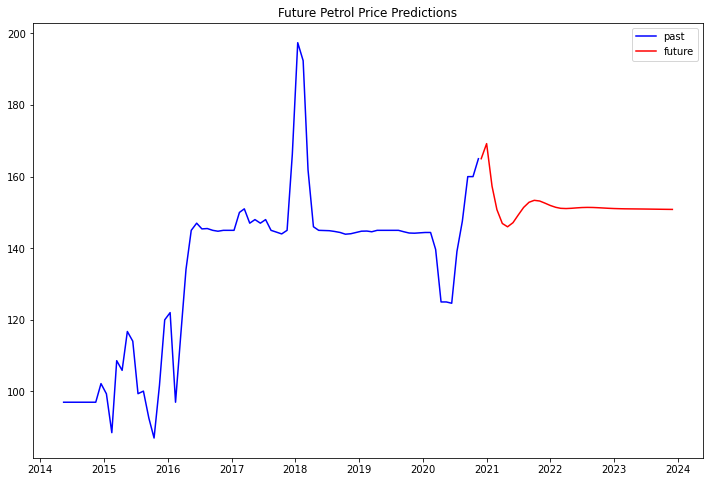

In [40]:
plt.figure(figsize=(12,8))

plt.plot(petrol['price'], c='blue', label='past')
plt.plot(future, c='red', label='future')
plt.title('Future Petrol Price Predictions')
plt.legend()
plt.show()

## Conclusion

The LSTM Model had an r2 score of 79,8% on the existing data, and has forecasted that petrol prices will reduce and remain steady for a while.